<a href="https://colab.research.google.com/github/jiayuanteng/Hands_on_ML2/blob/main/Introduction_to_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEEK 1
# A simple example with Neural Network

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

## Creat two numpy arrays

In [ ]:
def hw_function(x):
  return 2*x-1

x = np.array([-1, 0, 1, 2, 3, 4], dtype = float)
y = hw_function(x)

In [ ]:
y

array([-3., -1.,  1.,  3.,  5.,  7.])

### Define and compile the Neural Network

In [ ]:
# Build a simple Sequential model
model = tf.keras.Sequential([keras.layers.Dense(units = 1, input_shape = [1])])

In [ ]:
# Use mse as a loss function and sgd for the oportimizer function
# Compile the model
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

In [ ]:
# Train the neural network
model.fit(x, y, epochs = 500)


Epoch 1/500
1/1 [==============================] - 0s 416ms/step - loss: 31.7875
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 25.3295
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 20.2421
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 16.2331
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 13.0728
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 10.5801
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 8.6130
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 7.0594
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 5.8313
Epoch 10/500
1/1 [==============================] - 0s 6ms/step - loss: 4.8594
Epoch 11/500
1/1 [==============================] - 0s 4ms/step - loss: 4.0892
Epoch 12/500
1/1 [==============================] - 0s 4ms/step - loss: 3.4777
Epoch 13/500
1/1 [==============================] - 0

In [ ]:
# Make a prediction
print(model.predict([10]))

[[18.978783]]


In [ ]:
np.arange(1,7)

array([1, 2, 3, 4, 5, 6])

# WEEK 2

# Coding a Computer Vision Neural Network

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
# Load the fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

In [ ]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_mnist(index):

  np.set_printoptions(linewidth = 320)

  print(f'LABEL: {training_labels[index]}')
  print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

  plt.imshow(training_images[index])


LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

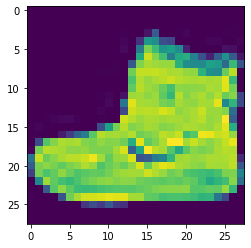

In [ ]:
plot_mnist(0)

In [ ]:
# scale feature to between 0 and 1
training_images = (training_images - training_images.min())/(training_images.max() - training_images.min()) 
test_images = (test_images - test_images.min())/(test_images.max() - test_images.min()) 

## Build a 3-layer neural network
1. Layer 1 has 784 units and each unit has 60000 examples, $X^{1}_{784*60000}$\
2. Layer 2 has 128 units, $Z^{[1]}_{128*60000} = W^{[1]}_{128*784} * X^{1}_{784*60000} + ϵ^{[1]}_{128*1}$, and activation function $A^{[1]} = g^{[1]}(Z^{[1]})$, where activation function is $ReLU = max(0, z)$

3. Layer 3 has 10 units (as 10 classes), $Z^{[2]}_{10*60000} = W^{[2]}_{10*128} * A^{1}_{128*60000} + ϵ^{[2]}_{10*1}$, and activation function $A^{[2]} = g^{[2]}(Z^{[2]})$, where activation function is Softmax. For example, $A^{[2]}_{1, 1} = \frac{e^{Z^{[2](1)}}}{\sum_{i=1}^{10}e^{Z^{[2](i)}}}$. Softmax returns the label for which an image has the highest probablity.



In [ ]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

In [ ]:
# Demonstrate softmax function
def softmax(x):
  y = np.exp(x)
  return y/y.sum(), np.argmax(y/y.sum())

print(softmax(np.array([1,3,4,2])))

(array([0.0320586 , 0.23688282, 0.64391426, 0.08714432]), 2)


In [ ]:
# Declare sample inputs and convert to a tensor
inputs = np.array([1, 3, 4, 2], dtype = float)
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.nn.softmax(inputs)
print(f'output to softmax function: {outputs.numpy()}')

# Get the sume of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [1. 3. 4. 2.]
output to softmax function: [0.0320586  0.23688282 0.64391426 0.08714432]
sum of outputs: 1.0
class with highest probability: 2


In [ ]:
# Compile the model - define optimizer and loss function
model.compile(optimizer=tf.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4952 - accuracy: 0.8265
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3768 - accuracy: 0.8653
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3393 - accuracy: 0.8770
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3139 - accuracy: 0.8858
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2958 - accuracy: 0.8916


In [ ]:
# Creating a Callback class
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    #check accuracy
    if (logs.get('loss')<0.2):
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [ ]:
# Train the model with a callback
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2807 - accuracy: 0.8964
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2674 - accuracy: 0.9017
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2564 - accuracy: 0.9044
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2454 - accuracy: 0.9089
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2397 - accuracy: 0.9113
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2315 - accuracy: 0.9137
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2246 - accuracy: 0.9152
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2157 - accuracy: 0.9189
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2106 - accuracy: 0.9205
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.206

# WEEK 3

# Enhancing Vision with CNN

Andrew Ng has very good videos made about Convolution Neural Network, available here [link text](https://www.youtube.com/playlist?list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF)

A convolution can do things like edge detection and can be applied many times to detect edges in different directions (e.g., vertical, horizontal). Ultimately, it works the same as if learning weights in NN to reduce height and weight of the feature matrix. For example, reducing $32*32*3$ to $28*28*8$ by convoluting with eight $5*5$ filters with a stride of 1. Volume increases from 3 (RGB) to 8 because of 8 filters used.   
## Andrew Ng's notes that explain the linkage between CNN and NN architecture. 

In the notes below, $6*6*3$ is the feature dimension. There are 2 filters, each with dimension of $3*3*3$. Each uses activation function Relu with a noise parameter. The output is $4*4*2$ dimension matrix. Weight and height are 4 because a filter is applied with a sliding windown fashion. After you move the filter from left to right and from top to bottom, you get $4*4$ matrix. There are 2 filters and therefore final dimension is $4*4*2$. A total number of parameters are $3*3*3*2+2 = 56$



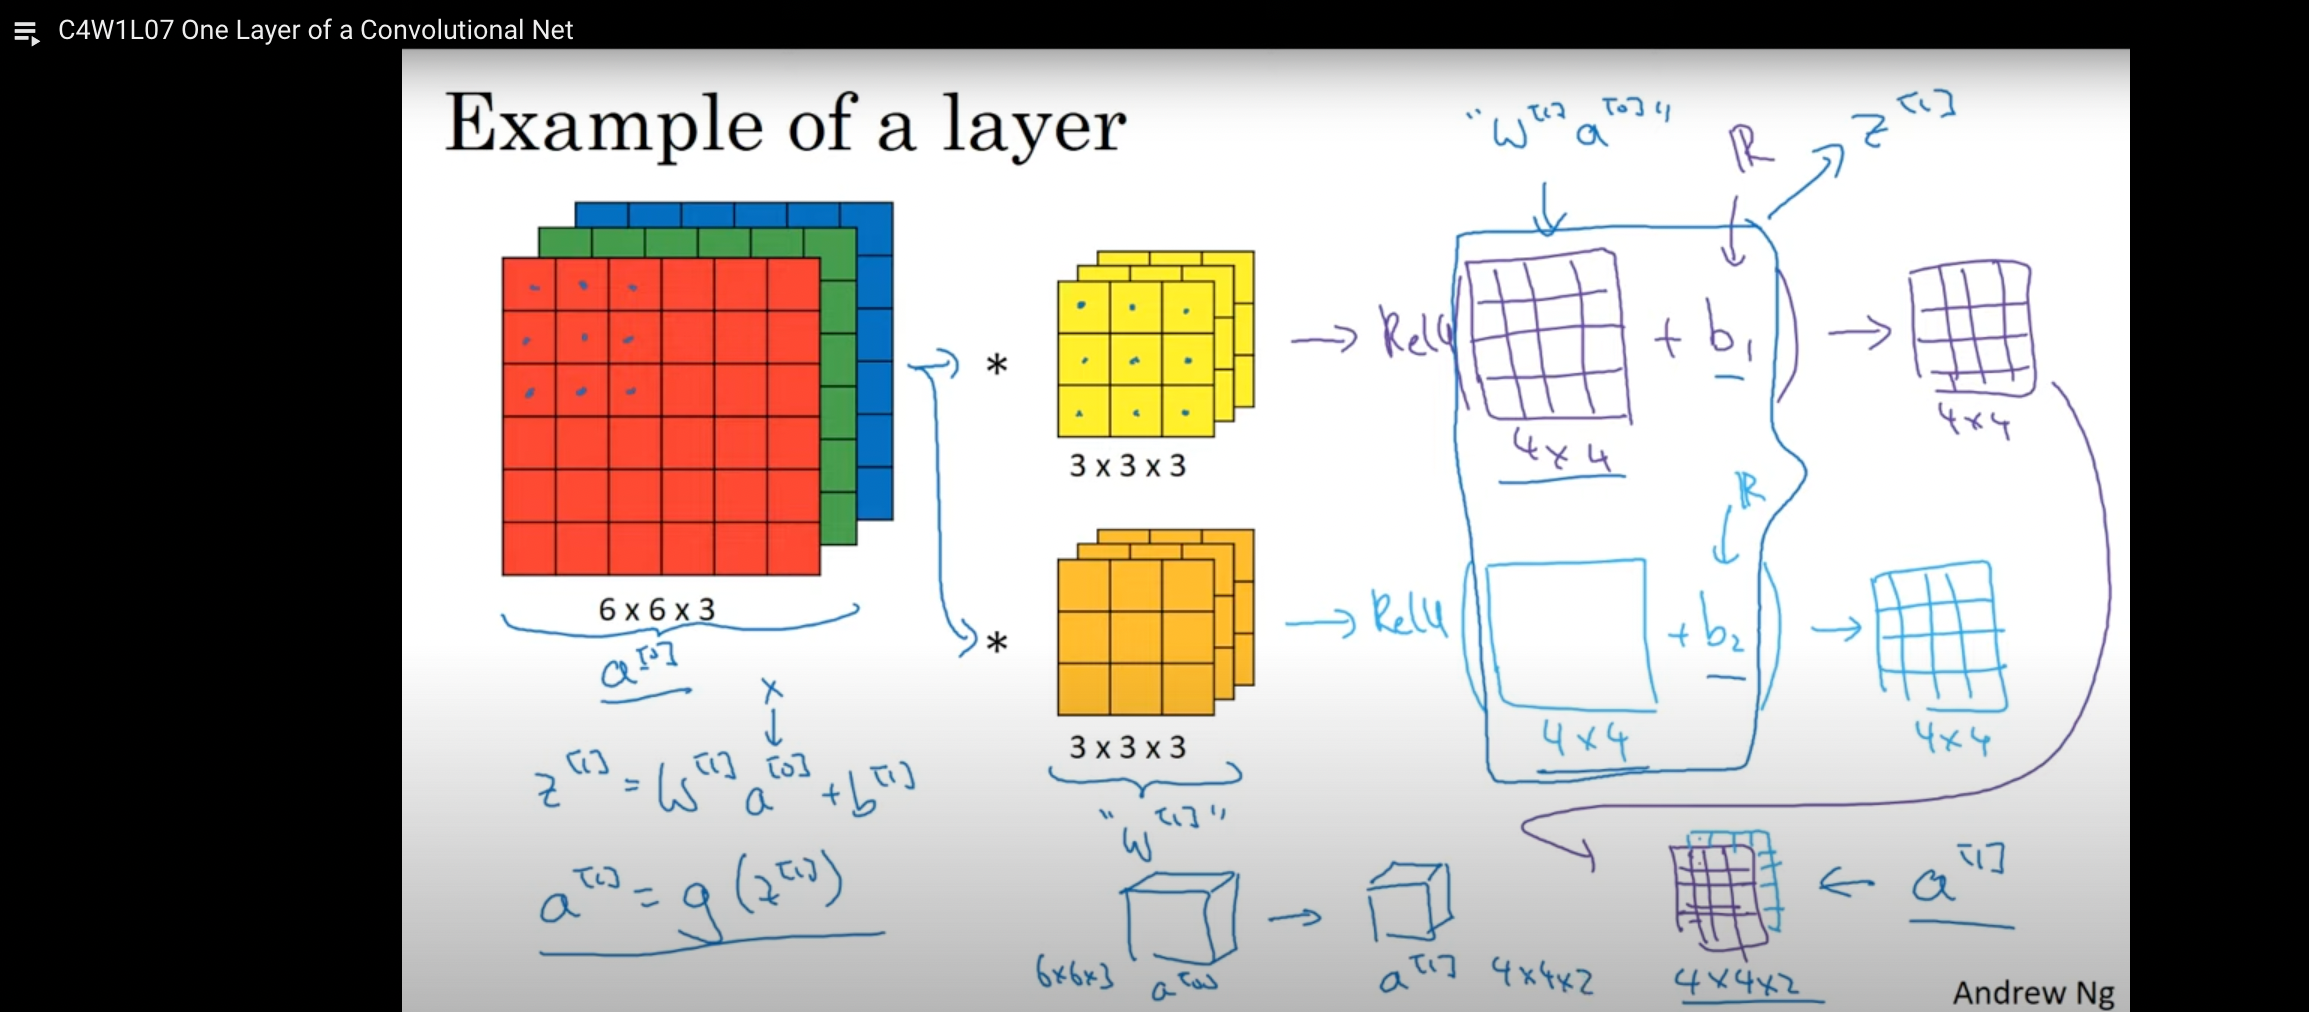

-1

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('drive/My Drive/Colab Notebooks/CNN Notes.png')
cv2_imshow(img)
cv2.waitKey()

In [ ]:
# Demonstrate the concept of convolution
def conv_single_step(x, filter, b):
  return np.sum(x*filter+b)

np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Z = -23.16021220252078


## An Example of CNN architecture from Andrew Ng's lecture

In this example (no padding), activation shape, activation size, and # of parameters learned are shown below. Here I assume parameters are the same in every channel of a convolution. For example, if every channel has its own parameters, the number of parameters for CONV1 is $5*5*3*8+8 = 608$

 Item | Activation shape | Activation Size | # parameters 
-------------------|--------|-----|----
Input feature       | (32, 32, 3) | 3072| 0 
CONV1(f=5, s=1, 8 filters) | (28, 28, 8) | 6272 | $5*5*8+8 = 208$
MaxPool1 (f=2, s=2) | (14, 14, 8) | 1568 | 0
CONV2(f=5, s=1, 16 filters) | (10, 10, 16)| 1600| 416
MaxPool2(f=2, s=2) | (5, 5, 16) | 400 | 0
FC3 | (120,1) | 120 | $120*400+120=48120$ 
FC4 |(84, 1) | 84 | 10164
Softmax (10 class) | (10, 1) | 10 | 850

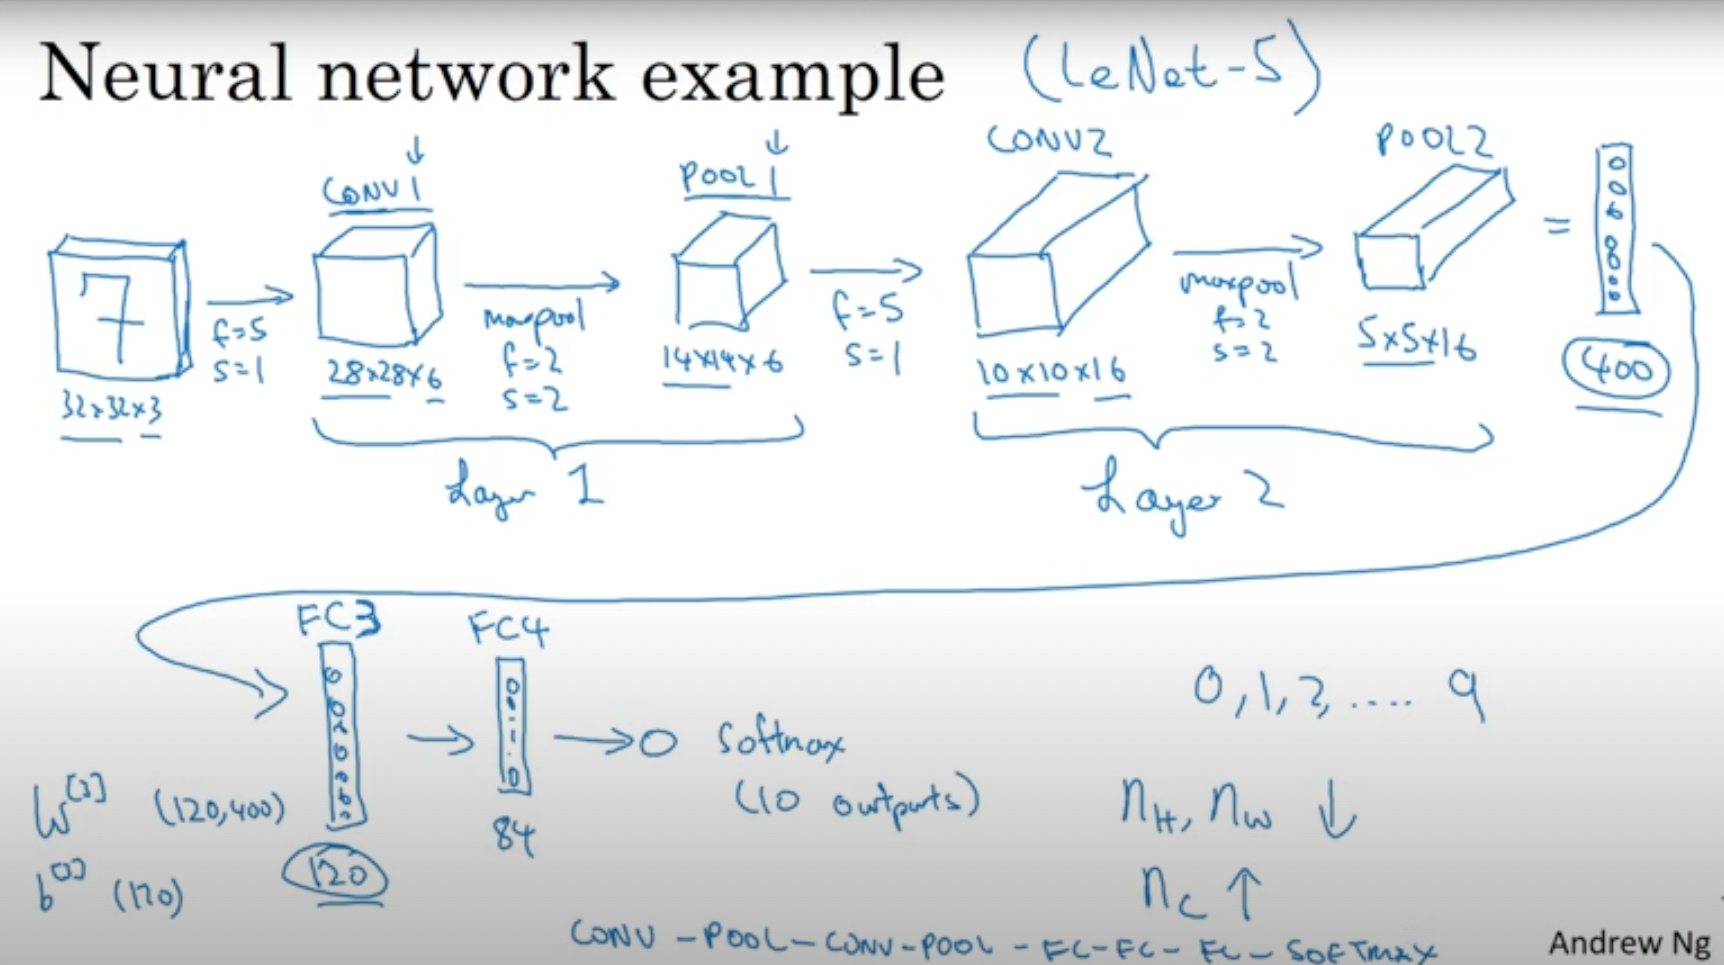

-1

In [ ]:


img = cv2.imread('drive/My Drive/Colab Notebooks/CNN Example.png')
cv2_imshow(img)
cv2.waitKey()

## Code from Tensorflow lecture
Architecture is 

$Conv1→POOL1→Conv2→POOL2→FC3→Softmax$

$CONV1$ and $CONV2$ are $3*3*32$.

In [ ]:
## Code from Tensorflow lecture
# Define the model 
import tensorflow as tf

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

# gray color image and therefore volume is 1
model = tf.keras.models.Sequential(
    [# add convolutions and max pooling
     tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
     tf.keras.layers.MaxPooling2D(2, 2), 
     tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
     tf.keras.layers.MaxPooling2D(2, 2),

    # flatten the previous layer
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation = 'relu'),
     tf.keras.layers.Dense(10, activation = 'softmax')
    
    ]
)
# print model summary
model.summary()

# Use same settings
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

# Train the model
print(f'\nModel Training')
model.fit(training_images, training_labels, epochs = 5)

# Evaluate on the test set
print(f'\nModel Evaluation:')
test_loss = model.evaluate(test_images, test_labels)



4431872/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                           

In [ ]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


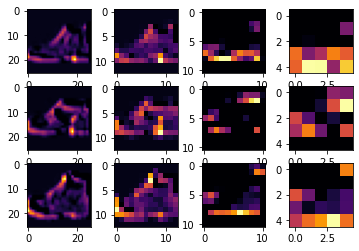

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [ ]:
layer_outputs 

[<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 13, 13, 32) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 11, 11, 32) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 5, 5, 32) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 800) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_1')>]

In [ ]:
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

# WEEK 4

In [2]:
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5 



In [3]:
%%writefile download.sh

#!/bin/bash
fileid="1onaG42NZft3wCE1WH0GDEbUhu75fedP5"
filename="horse-or-human.zip"
html=`curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=${fileid}"`
curl -Lb ./cookie "https://drive.google.com/uc?export=download&`echo ${html}|grep -Po '(confirm=[a-zA-Z0-9\-_]+)'`&id=${fileid}" -o ${filename}

Writing download.sh


In [4]:
!bash download.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  142M  100  142M    0     0  53.1M      0  0:00:02  0:00:02 --:--:-- 97.6M


In [5]:
import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [6]:
import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

In [7]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse02-9.png', 'horse42-0.png', 'horse47-0.png', 'horse49-8.png', 'horse24-9.png', 'horse46-1.png', 'horse05-5.png', 'horse26-5.png', 'horse30-8.png', 'horse45-0.png']
['human10-02.png', 'human04-01.png', 'human04-09.png', 'human04-27.png', 'human02-22.png', 'human08-29.png', 'human12-28.png', 'human09-27.png', 'human10-30.png', 'human14-21.png']


In [8]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

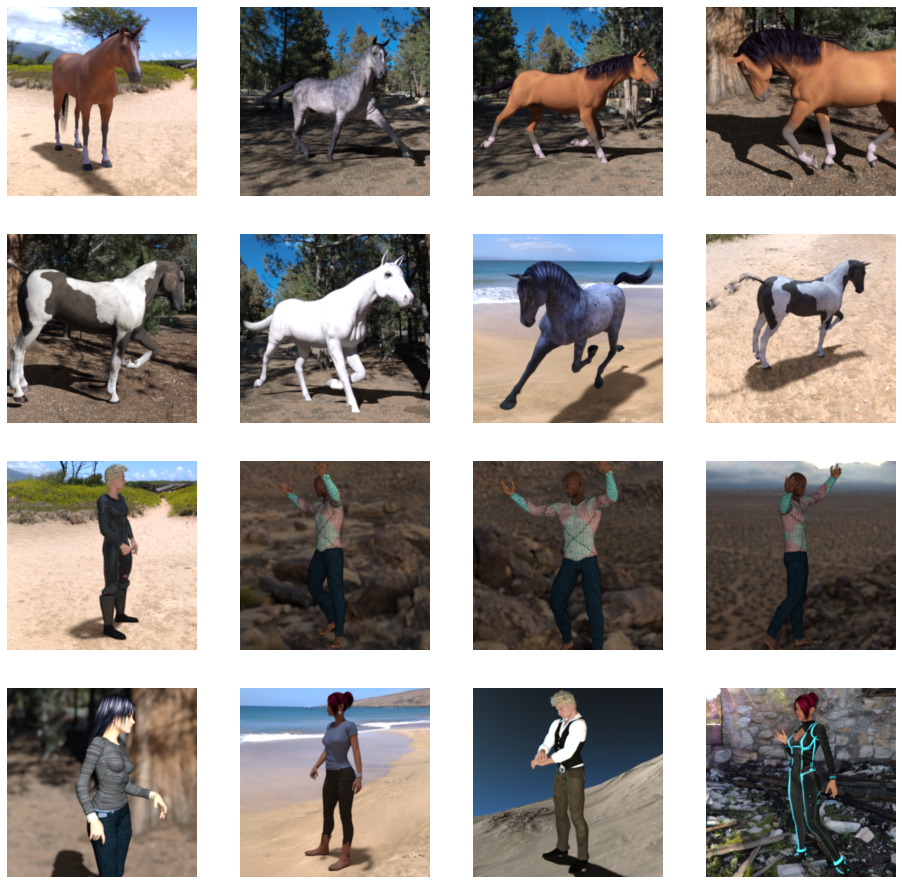

In [10]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [11]:
import tensorflow as tf

In [12]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        
        tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2, 2),      

        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(),
        
        tf.keras.layers.Dense(512, activation='relu'),
        
        # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
        tf.keras.layers.Dense(1, activation='sigmoid')


])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [16]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [18]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 59s 7s/step - loss: 1.2372 - accuracy: 0.5395
Epoch 2/15
8/8 [==============================] - 58s 7s/step - loss: 0.5867 - accuracy: 0.7253
Epoch 3/15
8/8 [==============================] - 63s 7s/step - loss: 0.5593 - accuracy: 0.7773
Epoch 4/15
8/8 [==============================] - 61s 8s/step - loss: 0.5928 - accuracy: 0.8447
Epoch 5/15
8/8 [==============================] - 54s 7s/step - loss: 0.2790 - accuracy: 0.8687
Epoch 6/15
8/8 [==============================] - 54s 7s/step - loss: 0.4585 - accuracy: 0.8354
Epoch 7/15
8/8 [==============================] - 54s 7s/step - loss: 0.2468 - accuracy: 0.9132
Epoch 8/15
8/8 [==============================] - 54s 7s/step - loss: 0.1408 - accuracy: 0.9377
Epoch 9/15
8/8 [==============================] - 55s 7s/step - loss: 0.3034 - accuracy: 0.8988
Epoch 10/15
8/8 [==============================] - 57s 7s/step - loss: 0.0766 - accuracy: 0.9700
Epoch 11/15
8/8 [======================

In [19]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
    
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 